In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("data/data2_nafilled.csv", parse_dates=["date"])
df.sort_values("date", inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()


,date,tempmax,tempmin,temp,dew,humidity,precip,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,pm25,aqi,aqi_source
0,2016-01-01,28.1,16.1,21.1,13.9,67.7,0.0,0.0,no rain,41.8,27.4,89.8,1020.9,38.9,6.0,240.5,20.7,8,2016-01-01 06:41:30,2016-01-01 18:04:12,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,NaN,107.0,BTM_temporal_interp
1,2016-01-02,28.1,14.1,21.4,10.4,54.1,0.0,0.0,no rain,37.8,22.3,85.4,1021.3,4.8,7.3,252.7,21.7,9,2016-01-02 06:41:53,2016-01-02 18:04:46,0.75,Clear,Clear conditions throughout the day.,clear-day,NaN,107.0,BTM_temporal_interp
2,2016-01-03,27.3,15.0,21.1,11.8,60.3,0.0,0.0,no rain,37.1,18.3,94.5,1020.0,10.0,7.2,252.9,21.7,9,2016-01-03 06:42:15,2016-01-03 18:05:19,0.78,Clear,Clear conditions throughout the day.,clear-day,107.0,107.0,original
3,2016-01-04,28.5,15.0,21.2,12.0,61.0,0.0,0.0,no rain,39.2,18.4,90.3,1019.9,10.8,7.1,253.6,21.9,9,2016-01-04 06:42:37,2016-01-04 18:05:53,0.81,Clear,Clear conditions throughout the day.,clear-day,132.0,132.0,original
4,2016-01-05,28.0,16.0,21.2,12.4,61.6,0.0,0.0,no rain,30.2,14.9,89.6,1019.0,8.0,6.6,255.0,22.0,9,2016-01-05 06:42:57,2016-01-05 18:06:27,0.85,Clear,Clear conditions throughout the day.,clear-day,134.0,134.0,original


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2922 non-null   datetime64[ns]
 1   tempmax           2922 non-null   float64       
 2   tempmin           2922 non-null   float64       
 3   temp              2922 non-null   float64       
 4   dew               2922 non-null   float64       
 5   humidity          2922 non-null   float64       
 6   precip            2922 non-null   float64       
 7   precipcover       2922 non-null   float64       
 8   preciptype        2922 non-null   object        
 9   windgust          2922 non-null   float64       
 10  windspeed         2922 non-null   float64       
 11  winddir           2922 non-null   float64       
 12  sealevelpressure  2922 non-null   float64       
 13  cloudcover        2922 non-null   float64       
 14  visibility        2922 n

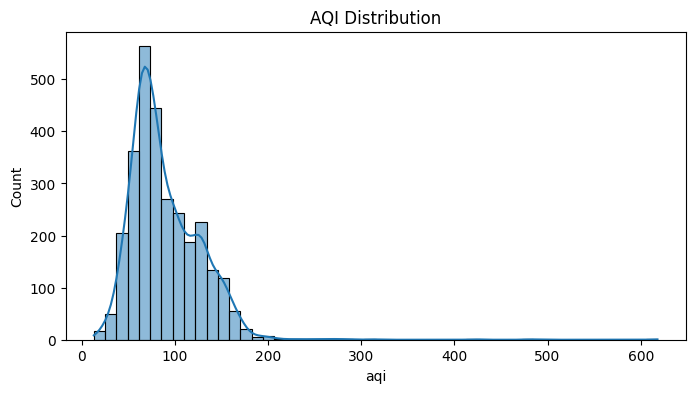

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df["aqi"], bins=50, kde=True)
plt.title("AQI Distribution")
plt.show()


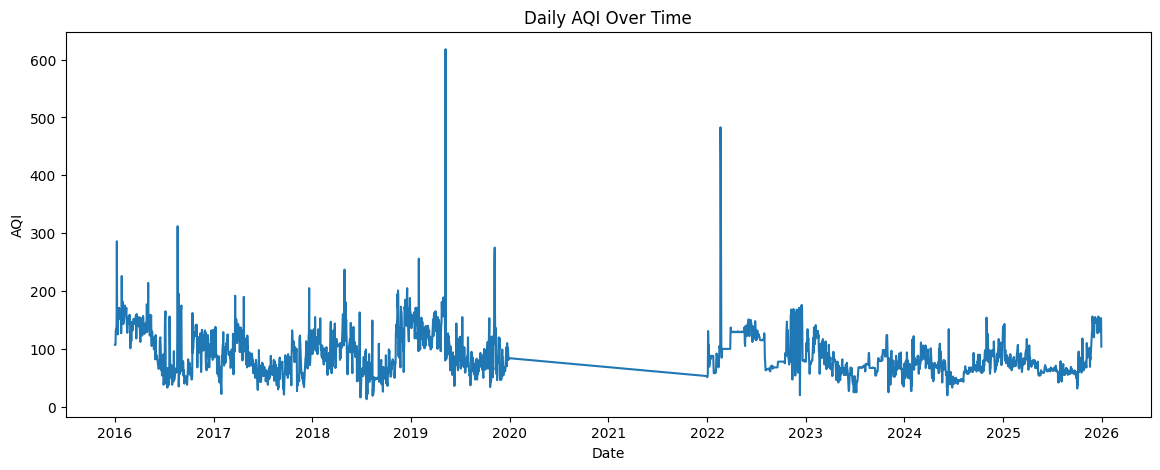

In [5]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["aqi"])
plt.title("Daily AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


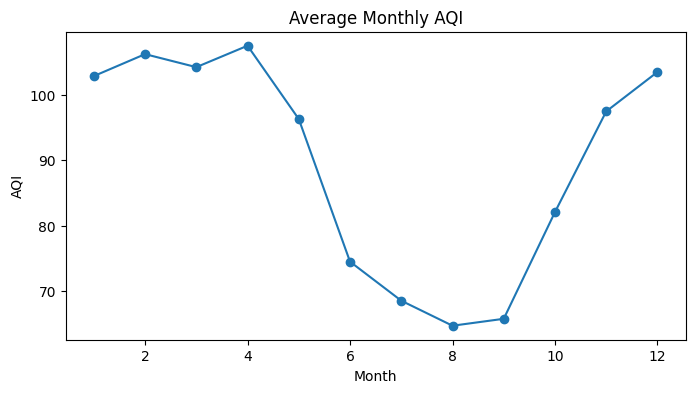

In [6]:
df["month"] = df["date"].dt.month

monthly_avg = df.groupby("month")["aqi"].mean()

plt.figure(figsize=(8,4))
monthly_avg.plot(marker="o")
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()


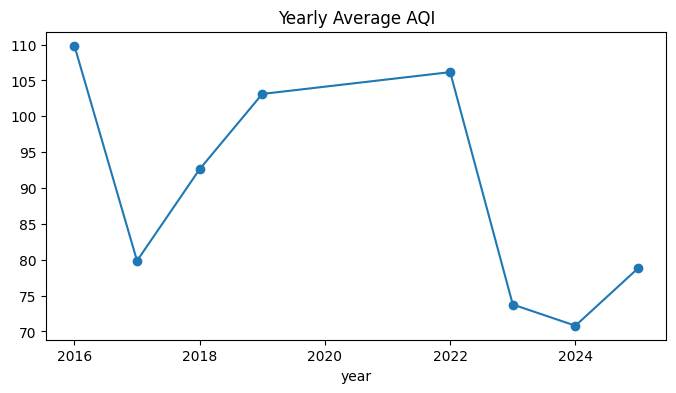

In [7]:
df["year"] = df["date"].dt.year

yearly_avg = df.groupby("year")["aqi"].mean()

plt.figure(figsize=(8,4))
yearly_avg.plot(marker="o")
plt.title("Yearly Average AQI")
plt.show()


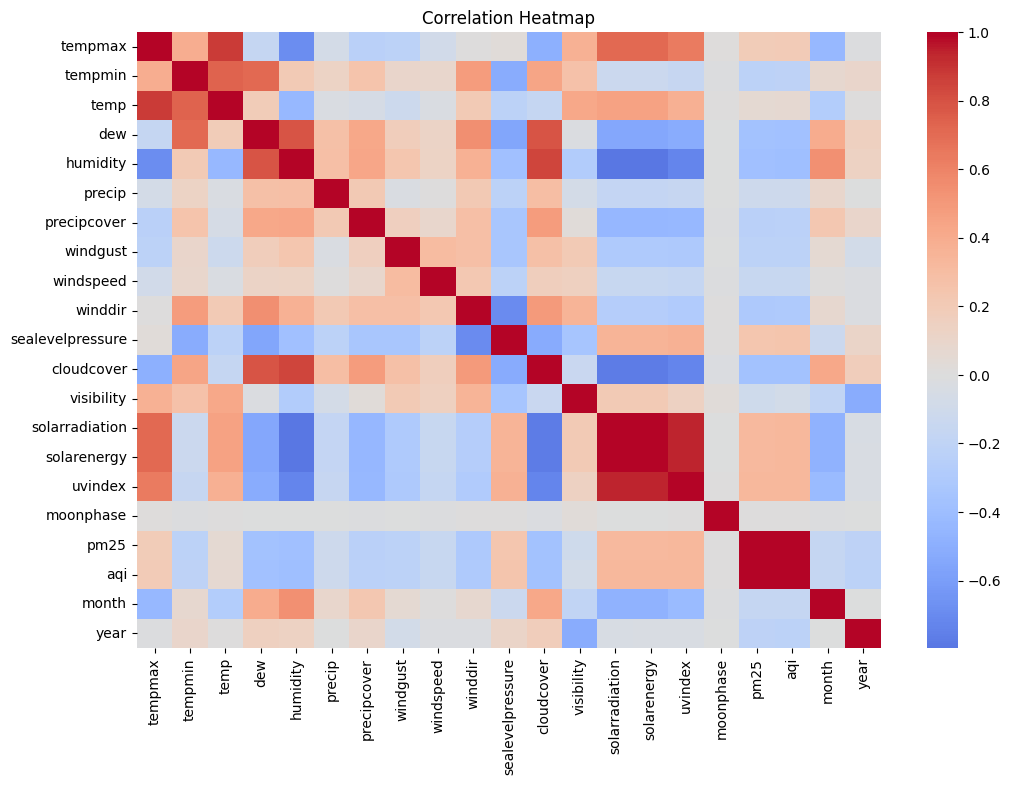

In [8]:
num_cols = df.select_dtypes(include="number")

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


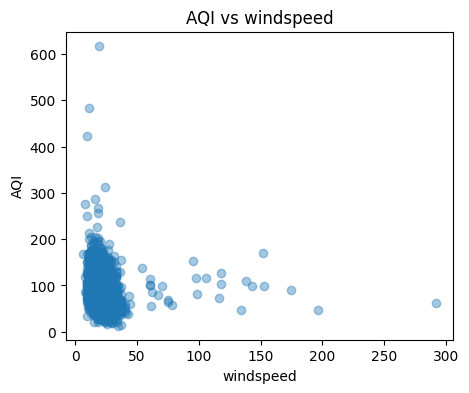

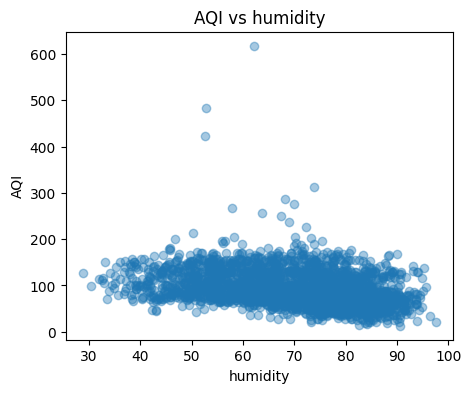

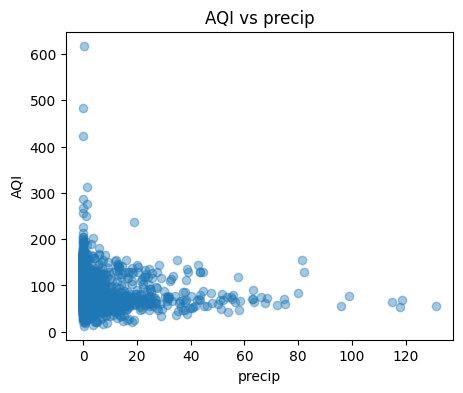

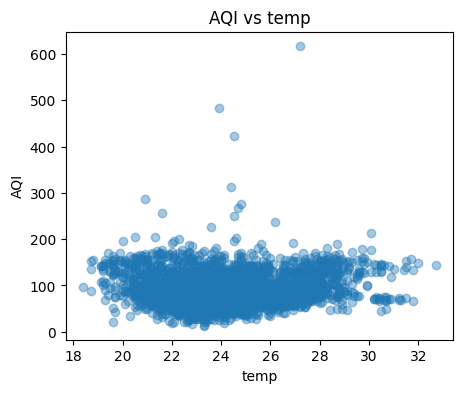

In [9]:
key_features = ["windspeed", "humidity", "precip", "temp"]

for col in key_features:
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df["aqi"], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel("AQI")
    plt.title(f"AQI vs {col}")
    plt.show()


In [10]:
df["aqi_source"].value_counts(normalize=True) * 100


aqi_source
original                      89.014374
BTM_temporal_interp            5.578371
aggregated_nearby_stations     3.867214
climatology_pm1_365            1.540041
Name: proportion, dtype: float64

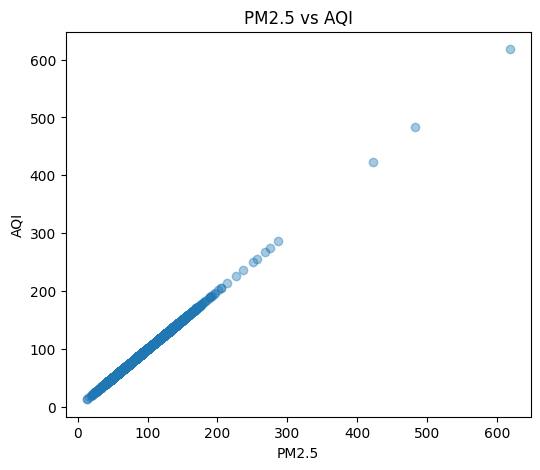

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(df["pm25"], df["aqi"], alpha=0.4)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("PM2.5 vs AQI")
plt.show()


In [12]:
df['aqi'].describe()

count    2922.000000
mean       89.365957
std        37.647546
min        13.000000
25%        64.000000
50%        80.000000
75%       113.000000
max       618.000000
Name: aqi, dtype: float64

In [13]:
df['aqi_source'].value_counts()

aqi_source
original                      2601
BTM_temporal_interp            163
aggregated_nearby_stations     113
climatology_pm1_365             45
Name: count, dtype: int64

In [15]:
df[df['aqi_source']=='BTM_temporal_interp']['aqi'].describe()

count    163.000000
mean      89.499223
std       32.209409
min       36.500000
25%       65.050000
50%       79.000000
75%      109.250000
max      173.750000
Name: aqi, dtype: float64

In [16]:
df[df['aqi_source']=='aggregated_nearby_stations']['aqi'].describe()

count    113.000000
mean      65.689940
std       37.889082
min       19.740014
25%       43.557482
50%       55.689158
75%       75.717838
max      312.000000
Name: aqi, dtype: float64

In [17]:
df[df['aqi_source']=='climatology_pm1_365']['aqi'].describe()

count     45.000000
mean      87.755307
std       20.593108
min       57.500000
25%       66.899963
50%       88.143939
75%      106.333333
max      117.190476
Name: aqi, dtype: float64

In [18]:
df[df['aqi_source']=='original']['aqi'].describe()

count    2601.000000
mean       90.414072
std        37.857085
min        13.000000
25%        65.000000
50%        80.000000
75%       115.000000
max       618.000000
Name: aqi, dtype: float64

In [19]:
df['pm25'].describe()

count    2601.000000
mean       90.414072
std        37.857085
min        13.000000
25%        65.000000
50%        80.000000
75%       115.000000
max       618.000000
Name: pm25, dtype: float64

In [30]:
df1=pd.read_csv('raw data/btm,-bangalore-air-quality.csv')
df1.head()

,date,pm25,pm10,o3,no2,so2,co
0,2026/1/1,151,80,7,7,5,
1,2026/1/2,141,80,7,7,5,1
2,2026/1/3,146,80,7,8,5,1
3,2026/1/4,144,80,7,8,5,1
4,2026/1/5,144,,,,,


In [34]:
df1['pm25']=pd.to_numeric(df1[' pm25'],errors='coerce')

In [36]:
df['pm25'].describe()

count    2601.000000
mean       90.414072
std        37.857085
min        13.000000
25%        65.000000
50%        80.000000
75%       115.000000
max       618.000000
Name: pm25, dtype: float64

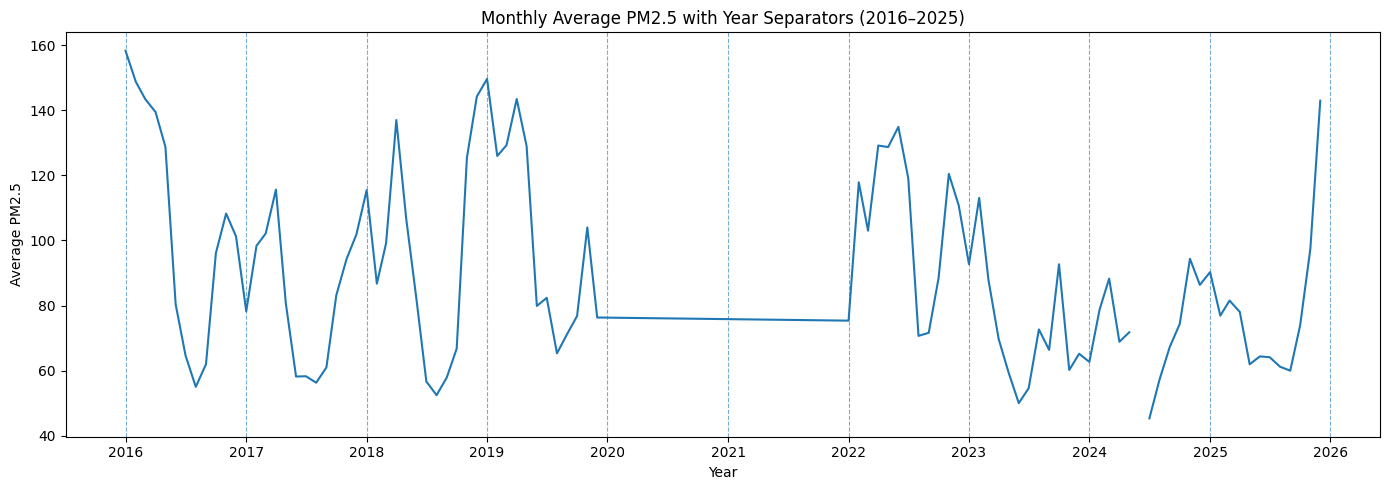

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Monthly average (as you already did)
monthly_avg = (
    df.groupby(df["date"].dt.to_period("M"))["pm25"]
      .mean()
)

monthly_avg.index = monthly_avg.index.to_timestamp()

plt.figure(figsize=(14, 5))
plt.plot(monthly_avg.index, monthly_avg.values)

# Add vertical lines at each year boundary
for year in range(2016, 2027):
    plt.axvline(
        x=pd.Timestamp(f"{year}-01-01"),
        linestyle="--",
        linewidth=0.8,
        alpha=0.6
    )

# Format x-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 with Year Separators (2016–2025)")
plt.tight_layout()
plt.show()


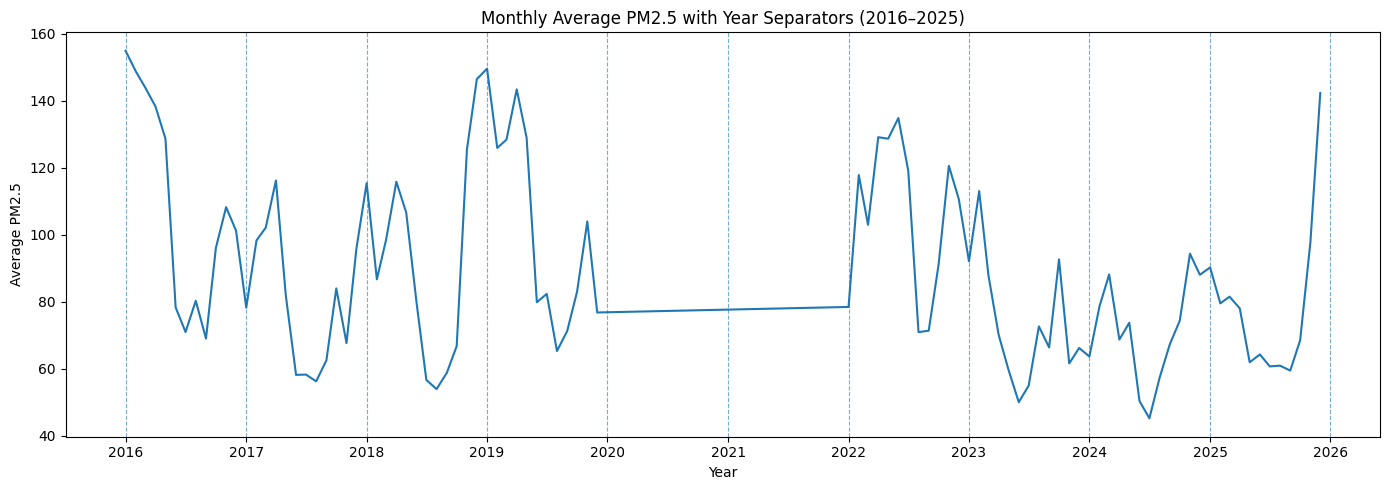

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Monthly average (as you already did)
monthly_avg = (
    df.groupby(df["date"].dt.to_period("M"))["aqi"]
      .mean()
)

monthly_avg.index = monthly_avg.index.to_timestamp()

plt.figure(figsize=(14, 5))
plt.plot(monthly_avg.index, monthly_avg.values)

# Add vertical lines at each year boundary
for year in range(2016, 2027):
    plt.axvline(
        x=pd.Timestamp(f"{year}-01-01"),
        linestyle="--",
        linewidth=0.8,
        alpha=0.6
    )

# Format x-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Monthly Average PM2.5 with Year Separators (2016–2025)")
plt.tight_layout()
plt.show()


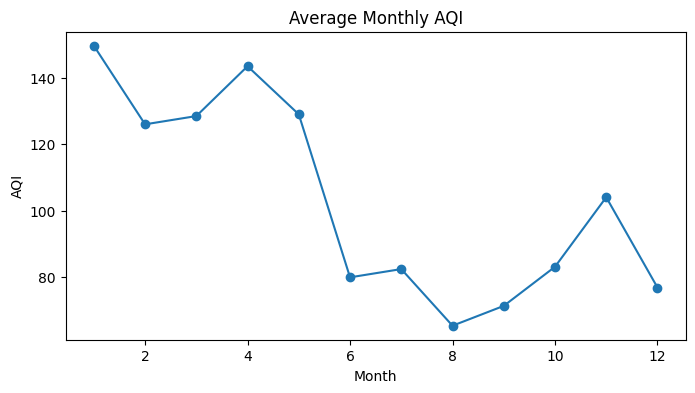

In [43]:
df=df[df['date'].dt.year==2019]
df["month"] = df["date"].dt.month

monthly_avg = df.groupby("month")["aqi"].mean()

plt.figure(figsize=(8,4))
monthly_avg.plot(marker="o")
plt.title("Average Monthly AQI")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_pacf(df["aqipm25"].dropna(), lags=40)


In [ ]:
plot_pacf(df["aqipm25"].dropna(), lags=40)